# 7. Interpolation needs

Let's plot the census blocks from which we will extract the data and the police precincts, upon which we want to integrate the data.

In [1]:
import matplotlib.pyplot as plt

from cpe_help import list_departments
from cpe_help.util import crs

In [2]:
epsg2163 = {'init': 'epsg:2163'}
epsg4326 = crs.epsg4326

In [3]:
def plot_boundaries(dept, ax):
    bgs = dept.load_block_groups()
    police = dept.load_preprocessed_shapefile()
    police = police.to_crs(bgs.crs)

    ax.set_title(f'Dept {dept.name}')
    ax.set_aspect('equal')

    bgs.plot(ax=ax, facecolor='green', edgecolor='white', alpha=0.5)
    police.plot(ax=ax, facecolor='blue', edgecolor='black', alpha=0.5)

    x1, y1, x2, y2 = police.total_bounds
    xmargin = (x2 - x1) / 50
    ymargin = (y2 - y1) / 50
    ax.set_xlim(x1 - xmargin, x2 + xmargin)
    ax.set_ylim(y1 - ymargin, y2 + ymargin)
    
    
def plot_densities(dept, ax):
    bgs = dept.load_block_groups()
    bgs['Total Population'] = bgs['Total Population'].astype(int)
    bgs['Area'] = bgs.to_crs(epsg2163).area
    bgs['Density'] = bgs['Total Population'] / bgs['Area']

    police = dept.load_preprocessed_shapefile()
    police = police.to_crs(bgs.crs)
    
    x1, y1, x2, y2 = police.total_bounds
    xmargin = (x2 - x1) / 50
    ymargin = (y2 - y1) / 50
    x1 -= xmargin
    x2 += xmargin
    y1 -= ymargin
    y2 += ymargin
    
    bgs = bgs.cx[x1:x2, y1:y2]
    
    ax.set_aspect('equal')
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)

    bgs.plot(
        ax=ax,
        column='Density',
        cmap='viridis',
        figsize=(16, 12),
    )
    
    ax.set_title(f'Density')
    
    
def plot_density_and_boundaries(dept, ax):
    bgs = dept.load_block_groups()
    bgs['Total Population'] = bgs['Total Population'].astype(int)
    bgs['Area'] = bgs.to_crs(epsg2163).area / (10 ** 6)
    bgs['Density'] = bgs['Total Population'] / bgs['Area']

    police = dept.load_preprocessed_shapefile()
    police = police.to_crs(bgs.crs)

    x1, y1, x2, y2 = police.total_bounds
    xmargin = (x2 - x1) / 50
    ymargin = (y2 - y1) / 50
    x1 -= xmargin
    x2 += xmargin
    y1 -= ymargin
    y2 += ymargin

    bgs = bgs.cx[x1:x2, y1:y2]

    ax.set_aspect('equal')
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)

    bgs.plot(
        ax=ax,
        column='Density',
        cmap='viridis',
        edgecolor='face',
        figsize=(16, 12),
        legend=True,
    )
    police.plot(
        ax=ax,
        facecolor='none',
        edgecolor='white',
        alpha=0.7,
    )
    
    ax.set_title(f'Dept. {dept.name}')

### Plot BG population densities (/km^2)

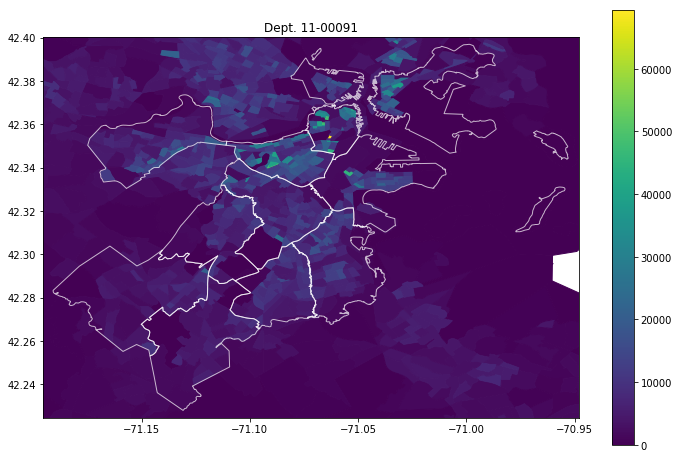

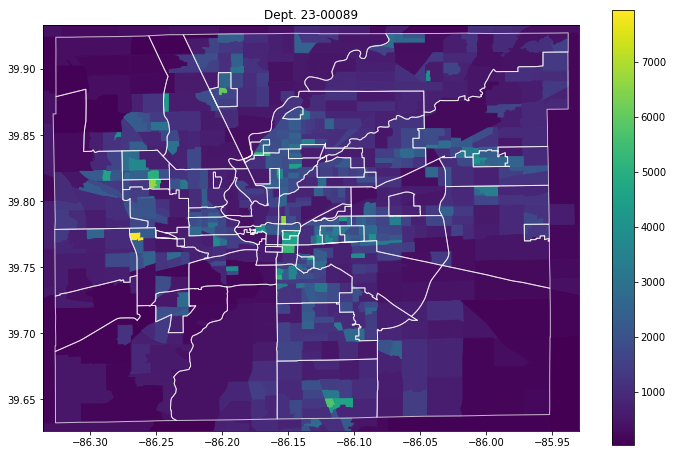

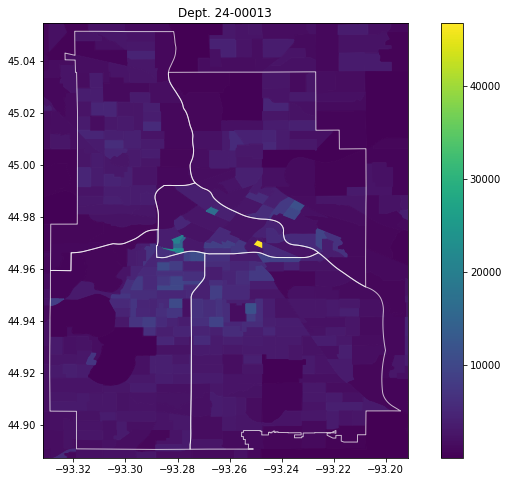

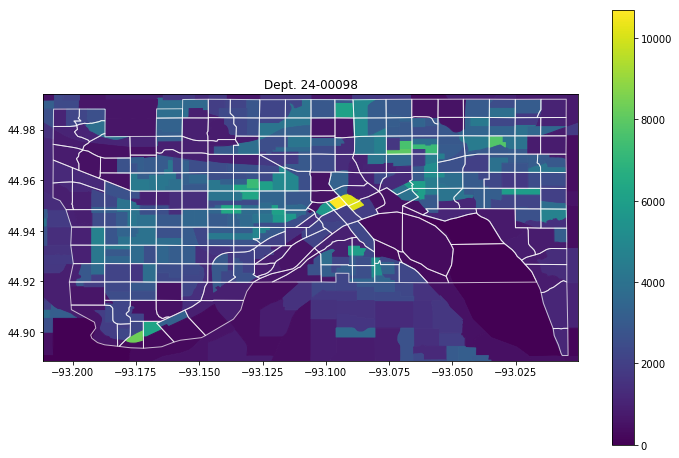

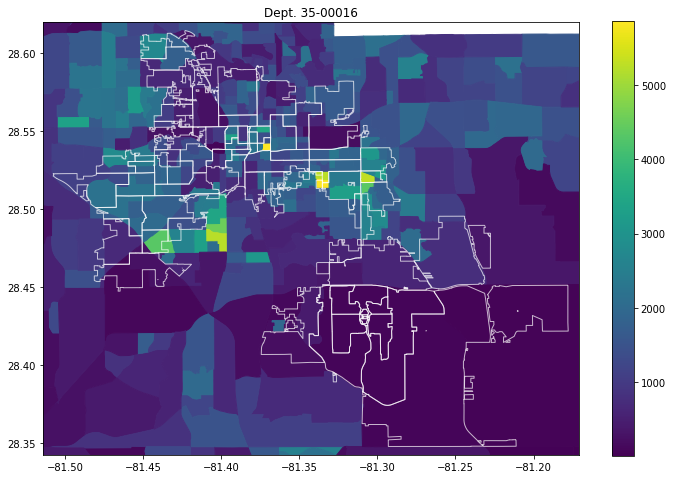

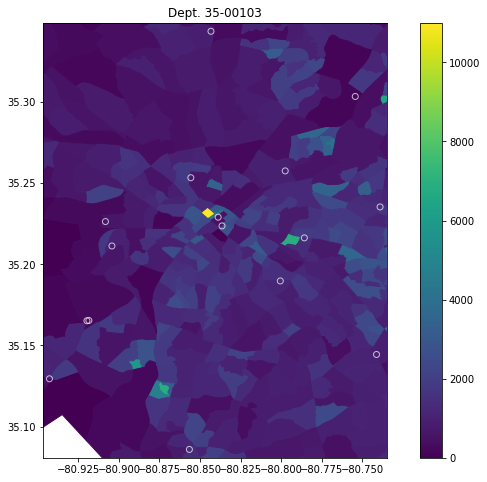

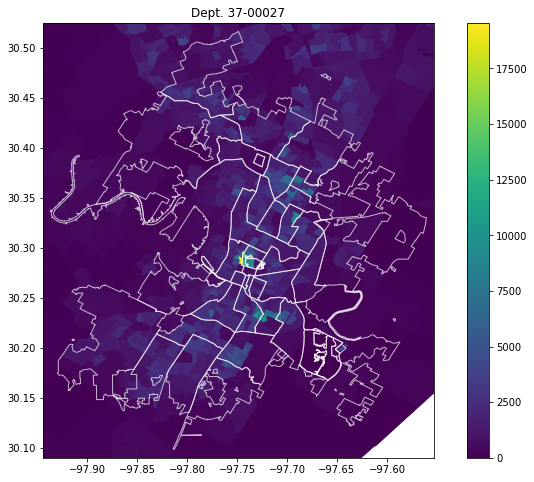

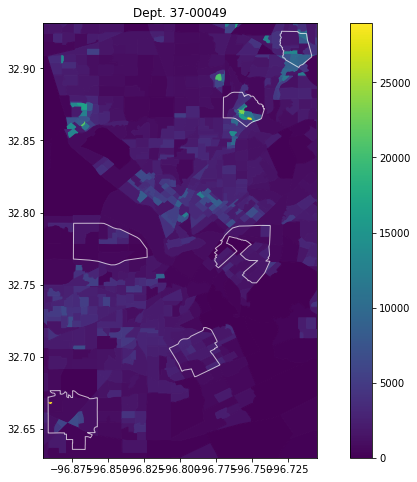

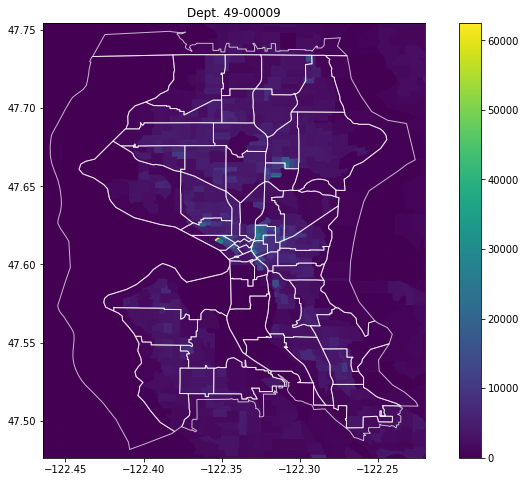

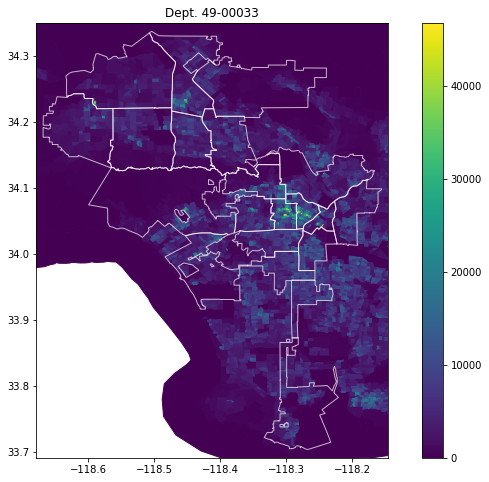

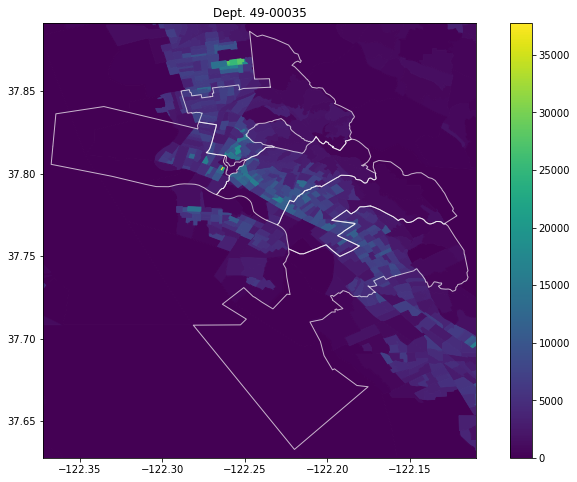

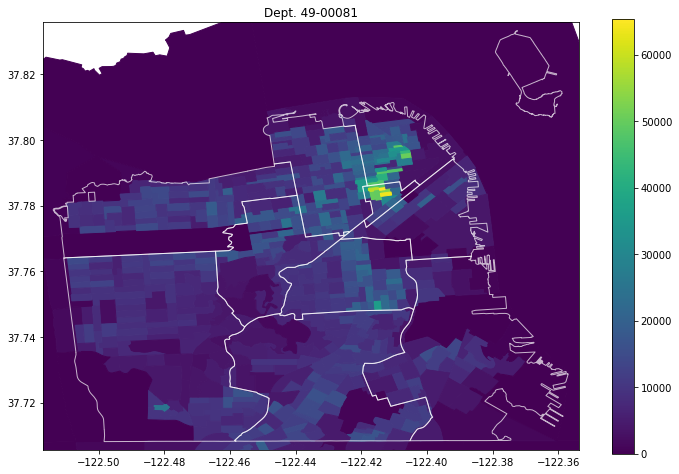

In [4]:
for dept in list_departments():
    fig, ax = plt.subplots(figsize=(12, 8))
    plot_density_and_boundaries(dept, ax)

Cities where n(police) >> n(bg) will be easy to deal with.

The problems starts when n(police) ~ n(bg), or in a similar manner, if min(A(police)) ~ A(bg)

There is also the problem that some isolated BG's are way denser than the surroundings. Yes, census tracts (and I believe BGs to a certain extent) are made to be homogenuous regions. But, how much can we trust that?

Dept. 24-00098 will be problematic.

Ref

- n(X) = number of X units
- A(x) = area of unit x
- police -> police division
- bg -> block group unit